In [104]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from scipy import stats
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB



from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
census_dataset=pd.read_csv(url)

# Exploratory Analysis

In [3]:
census_dataset.shape

(32560, 15)

In [4]:
pd.set_option('display.max_columns',None)
census_dataset.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
census_dataset.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
census_dataset['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [7]:
census_dataset.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
census_dataset.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
census_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<AxesSubplot:xlabel='Income', ylabel='count'>

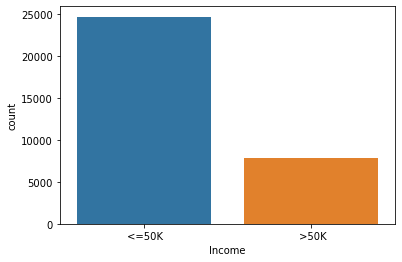

In [10]:
sns.countplot('Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Workclass'>

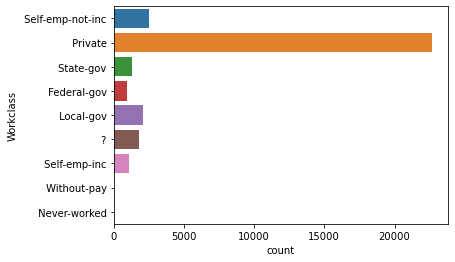

In [11]:
sns.countplot(y='Workclass',data=census_dataset)

In [12]:
census_dataset['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Workclass'>

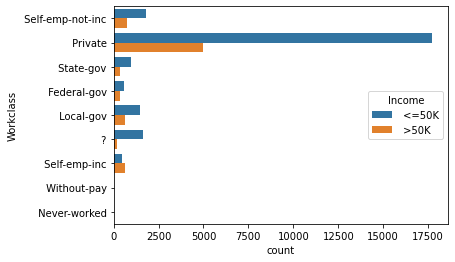

In [13]:
sns.countplot(y='Workclass',hue='Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Age'>

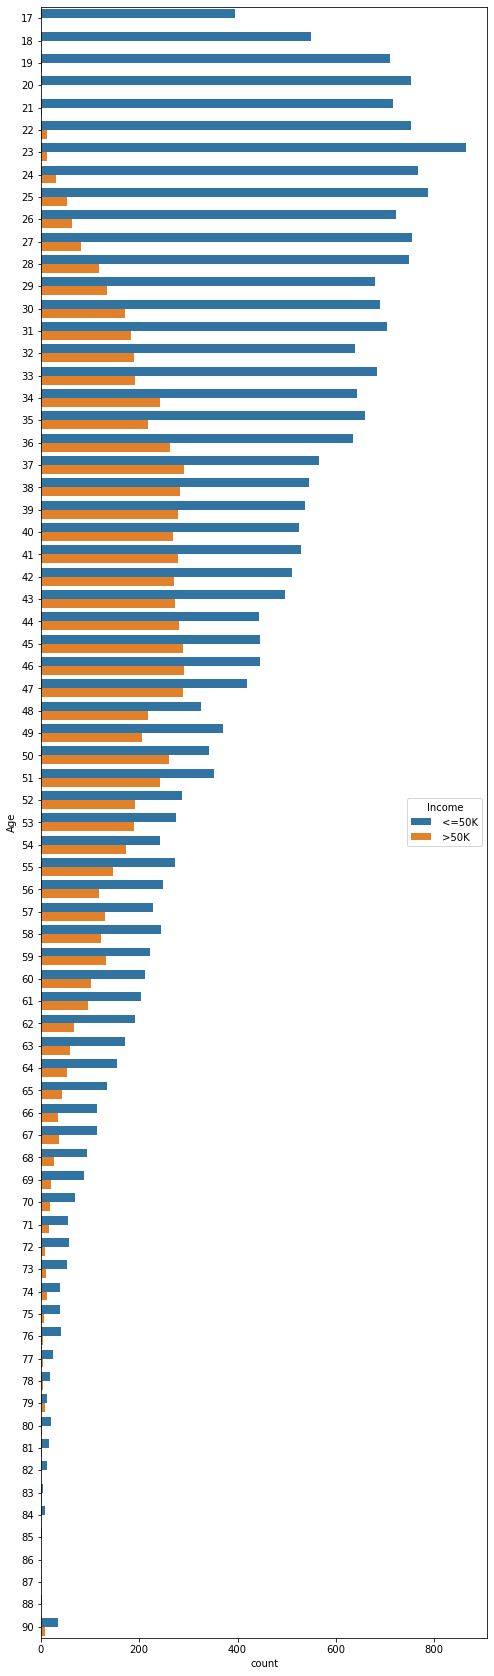

In [14]:
plt.figure(figsize = (8,30))
sns.countplot(y='Age',hue='Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Education'>

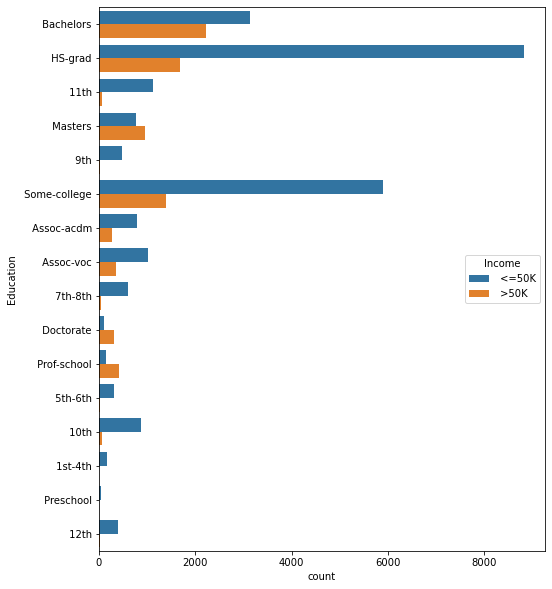

In [15]:
plt.figure(figsize = (8,10))
sns.countplot(y='Education',hue='Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Education_num'>

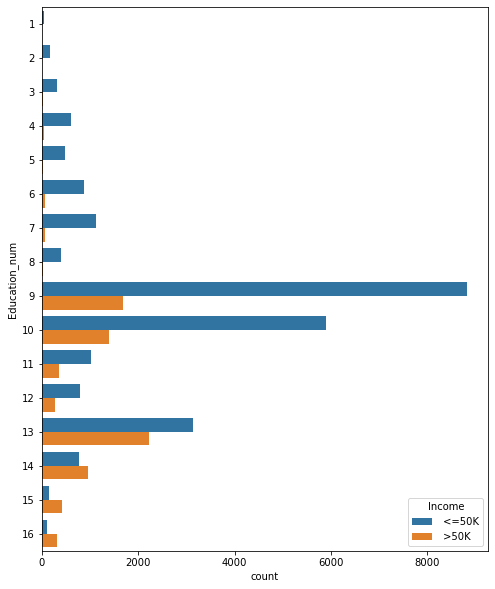

In [16]:
plt.figure(figsize = (8,10))
sns.countplot(y='Education_num',hue='Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

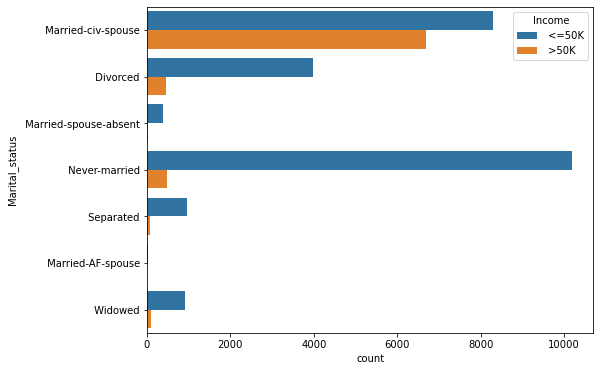

In [17]:
plt.figure(figsize = (8,6))
sns.countplot(y='Marital_status',hue='Income',data=census_dataset)

In [18]:
census_dataset['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Occupation'>

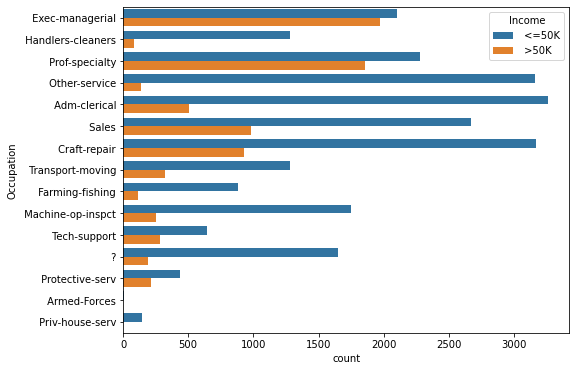

In [19]:
plt.figure(figsize = (8,6))
sns.countplot(y='Occupation',hue='Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Relationship'>

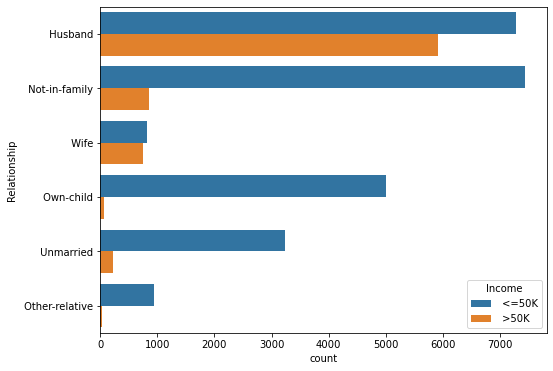

In [20]:
plt.figure(figsize = (8,6))
sns.countplot(y='Relationship',hue='Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Race'>

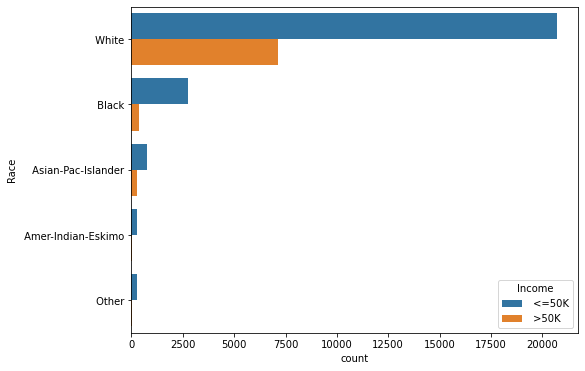

In [21]:
plt.figure(figsize = (8,6))
sns.countplot(y='Race',hue='Income',data=census_dataset)

In [22]:
census_dataset['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Sex'>

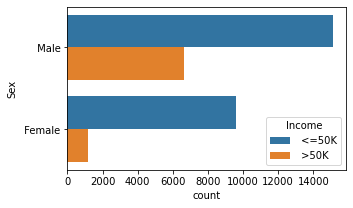

In [23]:
plt.figure(figsize = (5,3))
sns.countplot(y='Sex',hue='Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Native_country'>

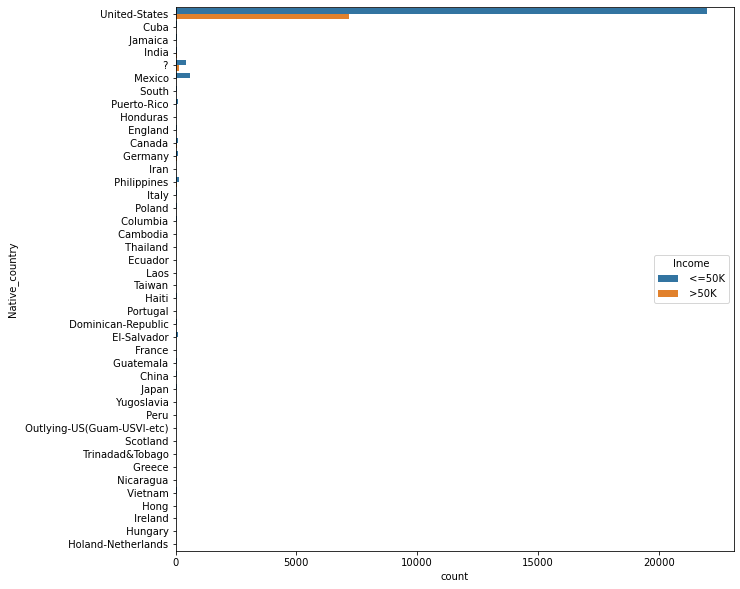

In [24]:
plt.figure(figsize = (10,10))
sns.countplot(y='Native_country',hue='Income',data=census_dataset)

In [25]:
census_dataset['Native_country'].value_counts()     

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='count', ylabel='Hours_per_week'>

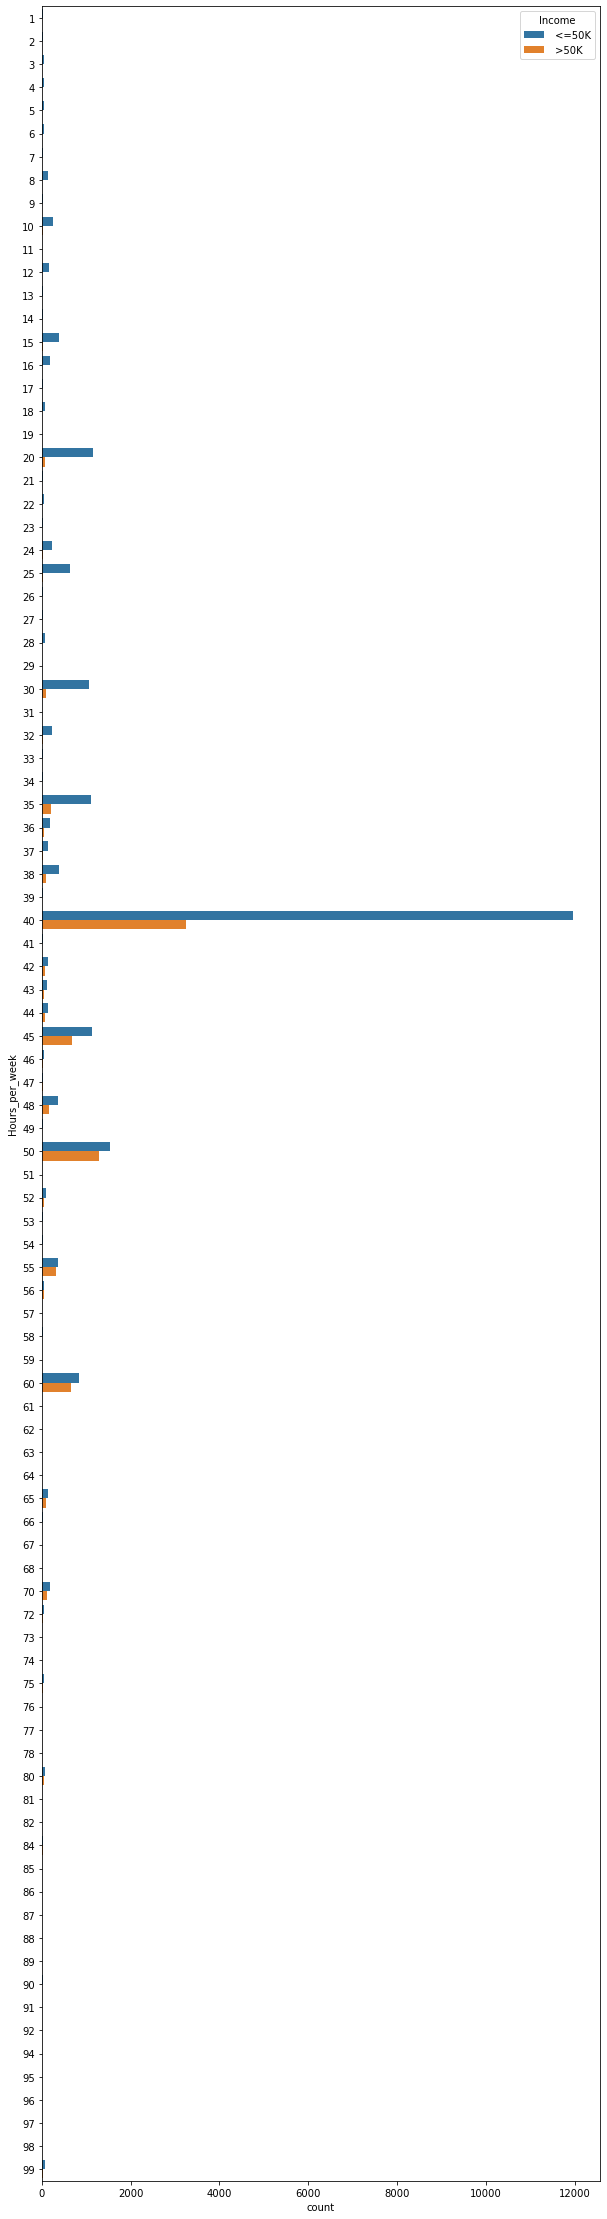

In [26]:
plt.figure(figsize = (10,40))
sns.countplot(y='Hours_per_week',hue='Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Capital_gain'>

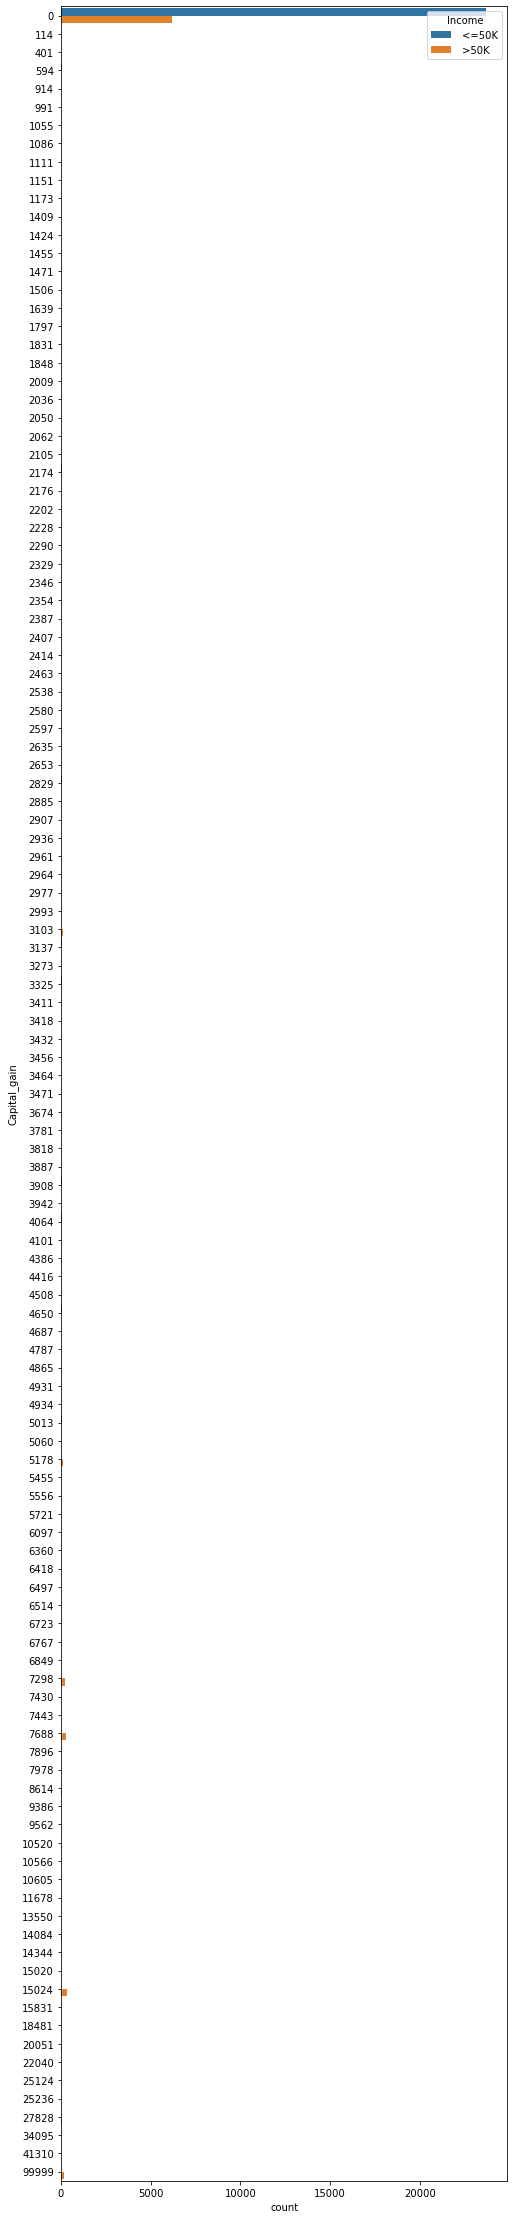

In [27]:
plt.figure(figsize = (8,40))
sns.countplot(y='Capital_gain',hue='Income',data=census_dataset)

<AxesSubplot:xlabel='count', ylabel='Capital_loss'>

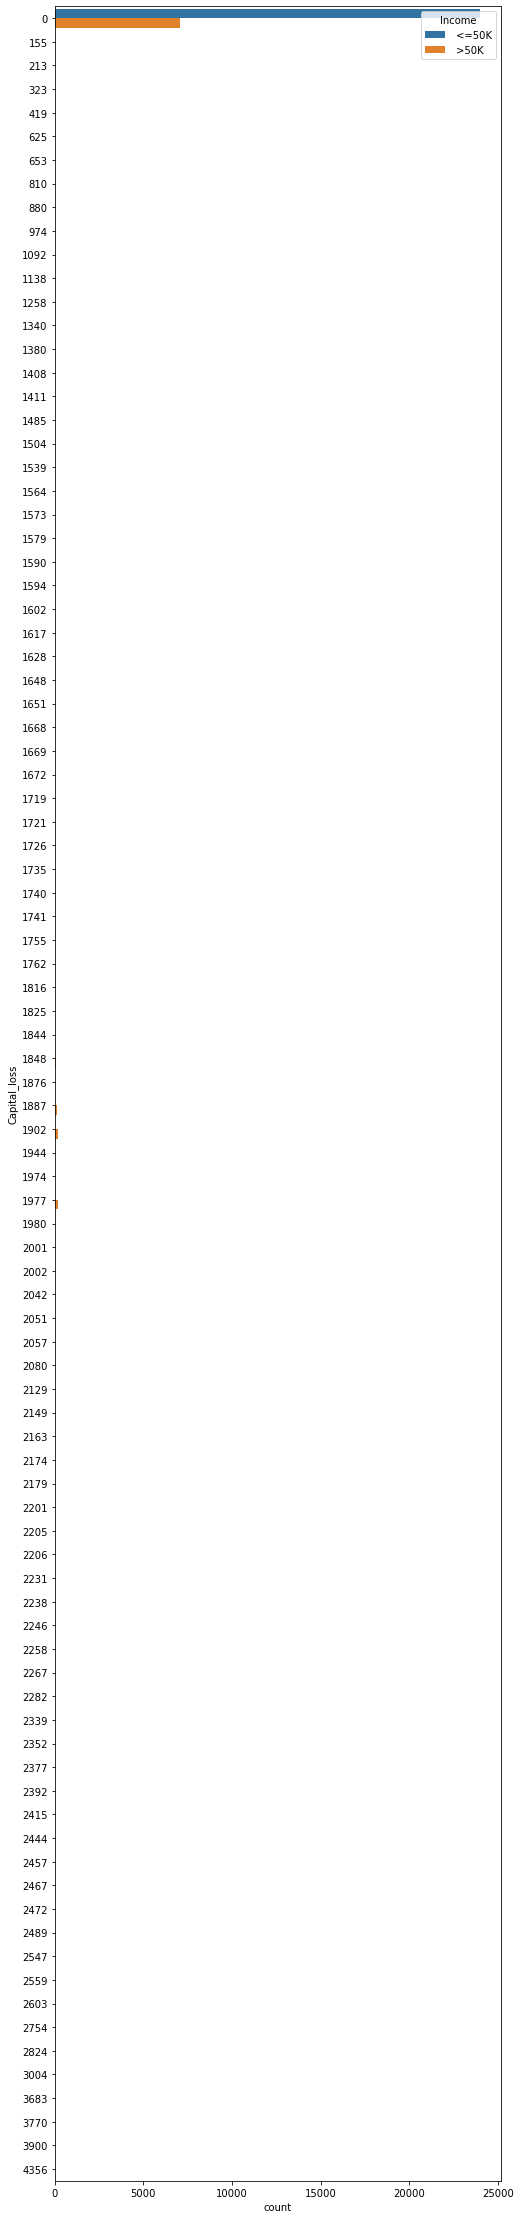

In [28]:
plt.figure(figsize = (8,40))
sns.countplot(y='Capital_loss',hue='Income',data=census_dataset)

In [29]:
print(census_dataset['Hours_per_week'].value_counts())

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
74        1
94        1
82        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


Observation:
1. Dataset size is large and also imbalanced.
2. No Null values in the dataset
3. Count of Private working classing is very high
4. Most of the columns have '?', these can be null values in the dataset.
5. Self employee has majority of more income than low income and federal govt. workclass have better marginal whisker between more and low income.
6. Income of above 50000 is normally distributed for age.
7. Bachelors and Master Grads have higher probability of higher income compared other educations. Also Education_num and Education columns might be corelated.
8. Occupation certainly effecting the income as high professional and managers seems to have higher income.
9. Relationship i.e. person who is husband is more like to have an higher income.
10. Martial status and Relationship can have multi-collinearly based on the observation.
11. Male have high income count.
12. Capitial gain-loss,Race and Country hardly playing any role in income.
13. Person working for 40 and 50 hours a week has more 50k plus income.

In [30]:
census_dataset.drop(census_dataset[census_dataset['Workclass']==' ?'].index,inplace=True)
census_dataset.drop(census_dataset[census_dataset['Occupation']==' ?'].index,inplace=True)
census_dataset.drop(census_dataset[census_dataset['Native_country']==' ?'].index,inplace=True)

In [31]:
census_dataset.drop(columns=['Education','Race','Capital_gain','Capital_loss'],inplace=True)

In [32]:
census_dataset['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [33]:
census_dataset['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [34]:
census_dataset.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [35]:
print(census_dataset['Sex'].dtype)

object


In [36]:
le=LabelEncoder()
for i in census_dataset:
    if census_dataset[i].dtype=='object':
        census_dataset[i]=le.fit_transform(census_dataset[i])

In [37]:
census_dataset.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Sex               int32
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [38]:
census_dataset.nunique()

Age                  72
Workclass             7
Fnlwgt            20262
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Sex                   2
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

Age


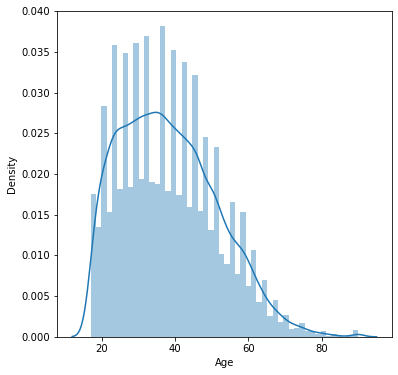

Workclass


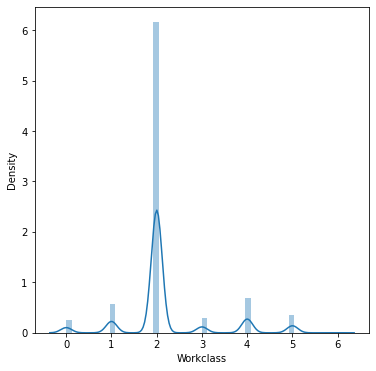

Fnlwgt


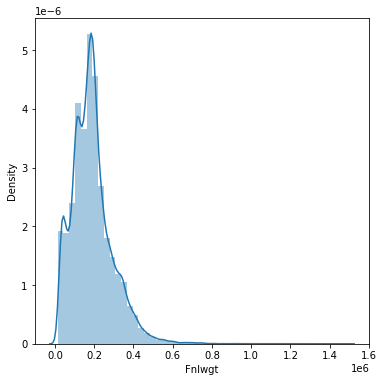

Education_num


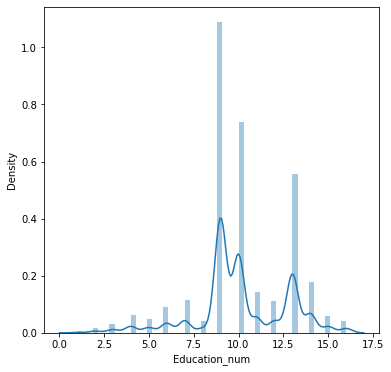

Marital_status


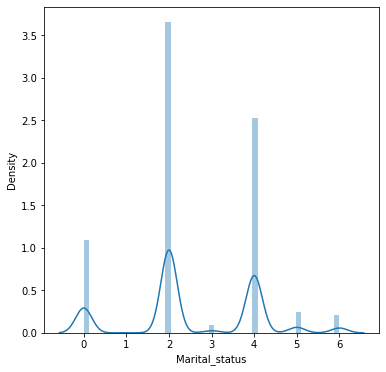

Occupation


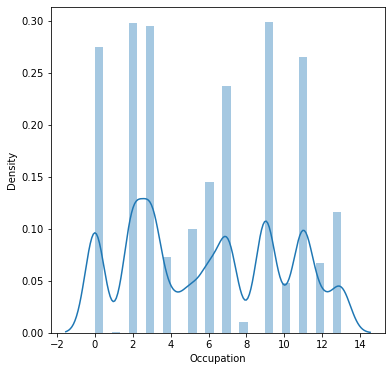

Relationship


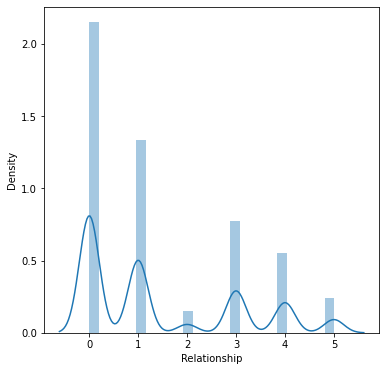

Sex


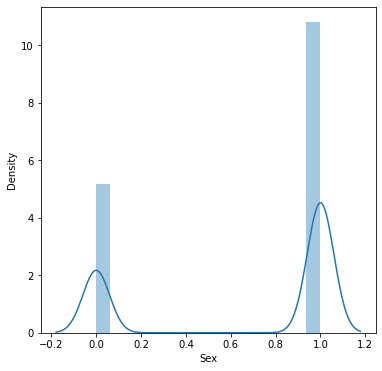

Hours_per_week


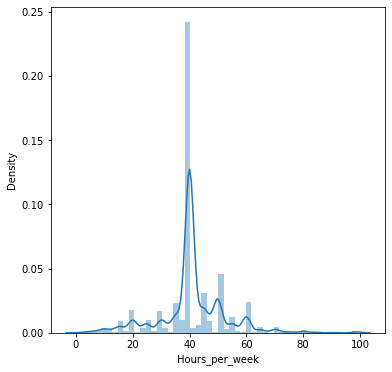

Native_country


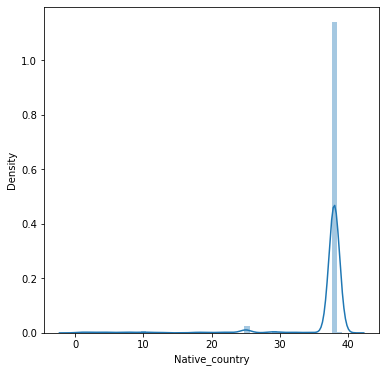

Income


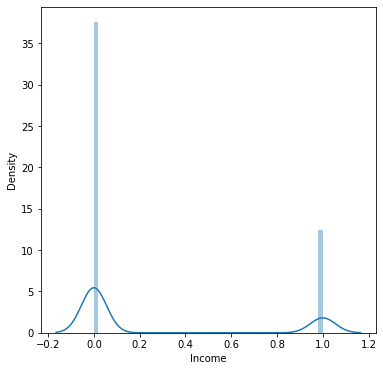

In [39]:
for i in census_dataset:
    print(i)
    plt.figure(figsize=(6,6))
    sns.distplot(census_dataset[i])
    plt.show()

Age


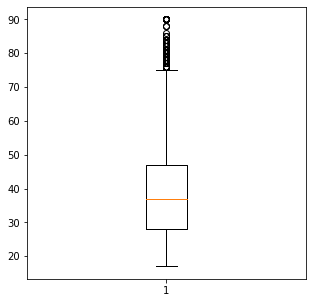

Workclass


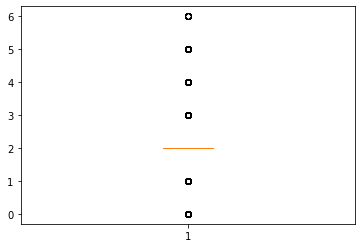

Fnlwgt


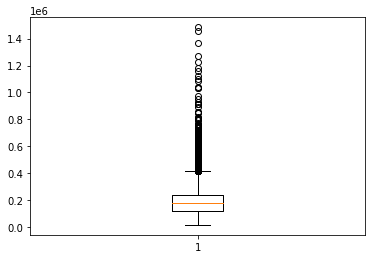

Education_num


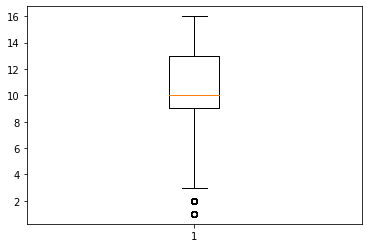

Marital_status


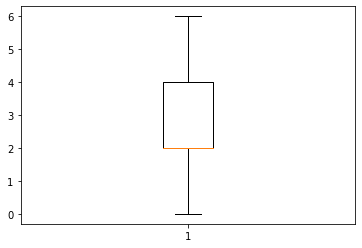

Occupation


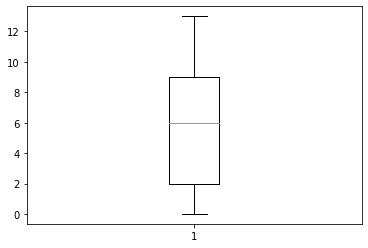

Relationship


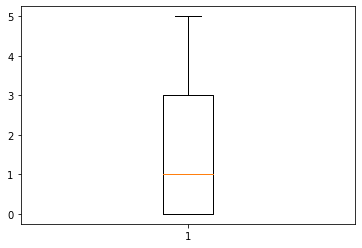

Sex


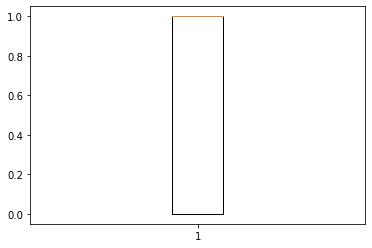

Hours_per_week


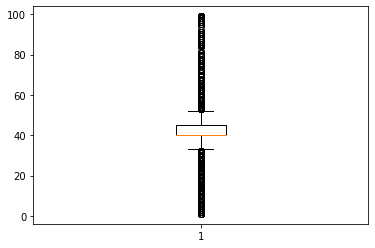

Native_country


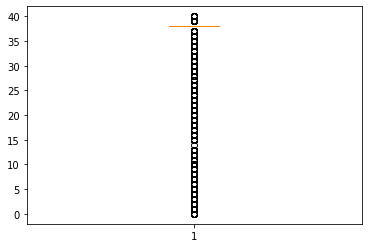

Income


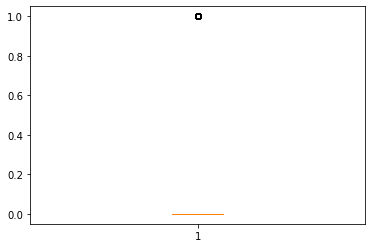

In [40]:
fig = plt.figure(figsize =(5, 5))
for i in census_dataset: 
    # Creating plot
    print(i)
    plt.boxplot(census_dataset[i])
    # show plot
    plt.show()

Age and Hours per weeks have outliers:
1. mostly people about the age 75 don't usually work.
2. mostly above 60 hours is generally not possible in common cases.

In [41]:
#arresting the outliers using IQR method
def arr_out(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[column] < Q1 - whisker_width*IQR) | (df[column] > Q3 + df*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[column]=np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))

In [42]:
arr_out(census_dataset,'Age')
arr_out(census_dataset,'Hours_per_week')
arr_out(census_dataset,'Fnlwgt')

Age


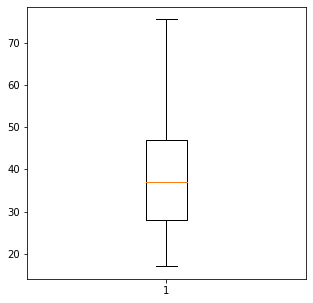

Workclass


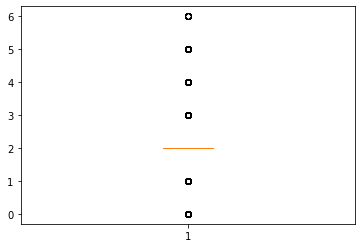

Fnlwgt


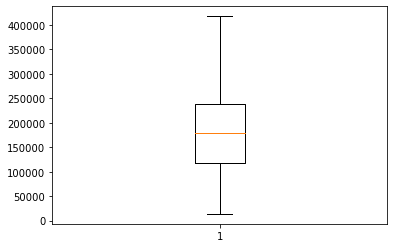

Education_num


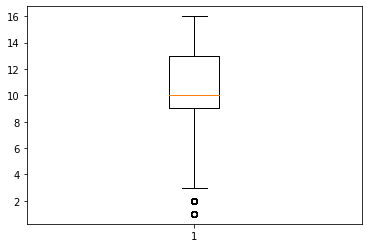

Marital_status


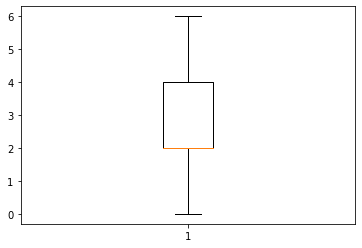

Occupation


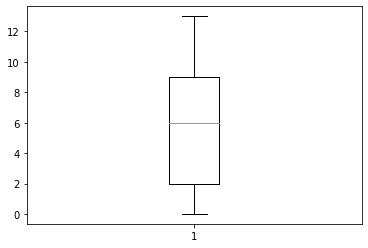

Relationship


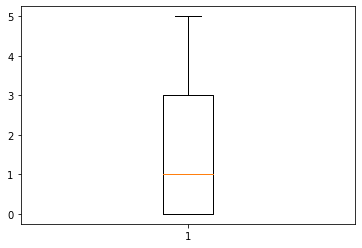

Sex


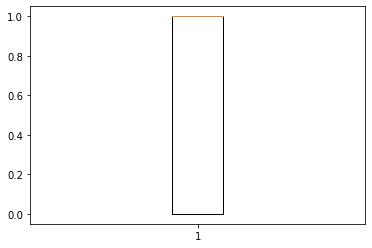

Hours_per_week


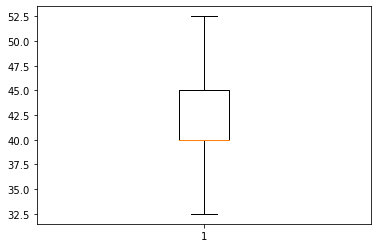

Native_country


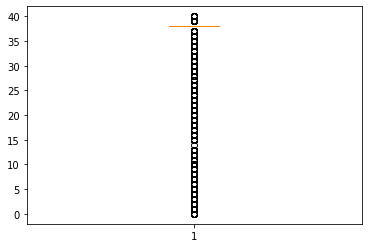

Income


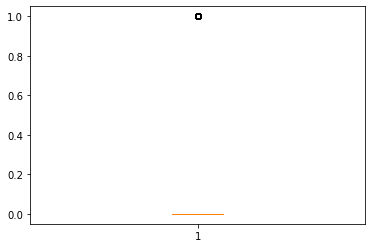

In [43]:
fig = plt.figure(figsize =(5, 5))
for i in census_dataset: 
    # Creating plot
    print(i)
    plt.boxplot(census_dataset[i])
    # show plot
    plt.show()

In [44]:
census_dataset.skew()

Age               0.469496
Workclass         1.154786
Fnlwgt            0.552773
Education_num    -0.305328
Marital_status   -0.009387
Occupation        0.110420
Relationship      0.820275
Sex              -0.750584
Hours_per_week    0.419154
Native_country   -4.178826
Income            1.161357
dtype: float64

Data skewness value is fairly symmetrical

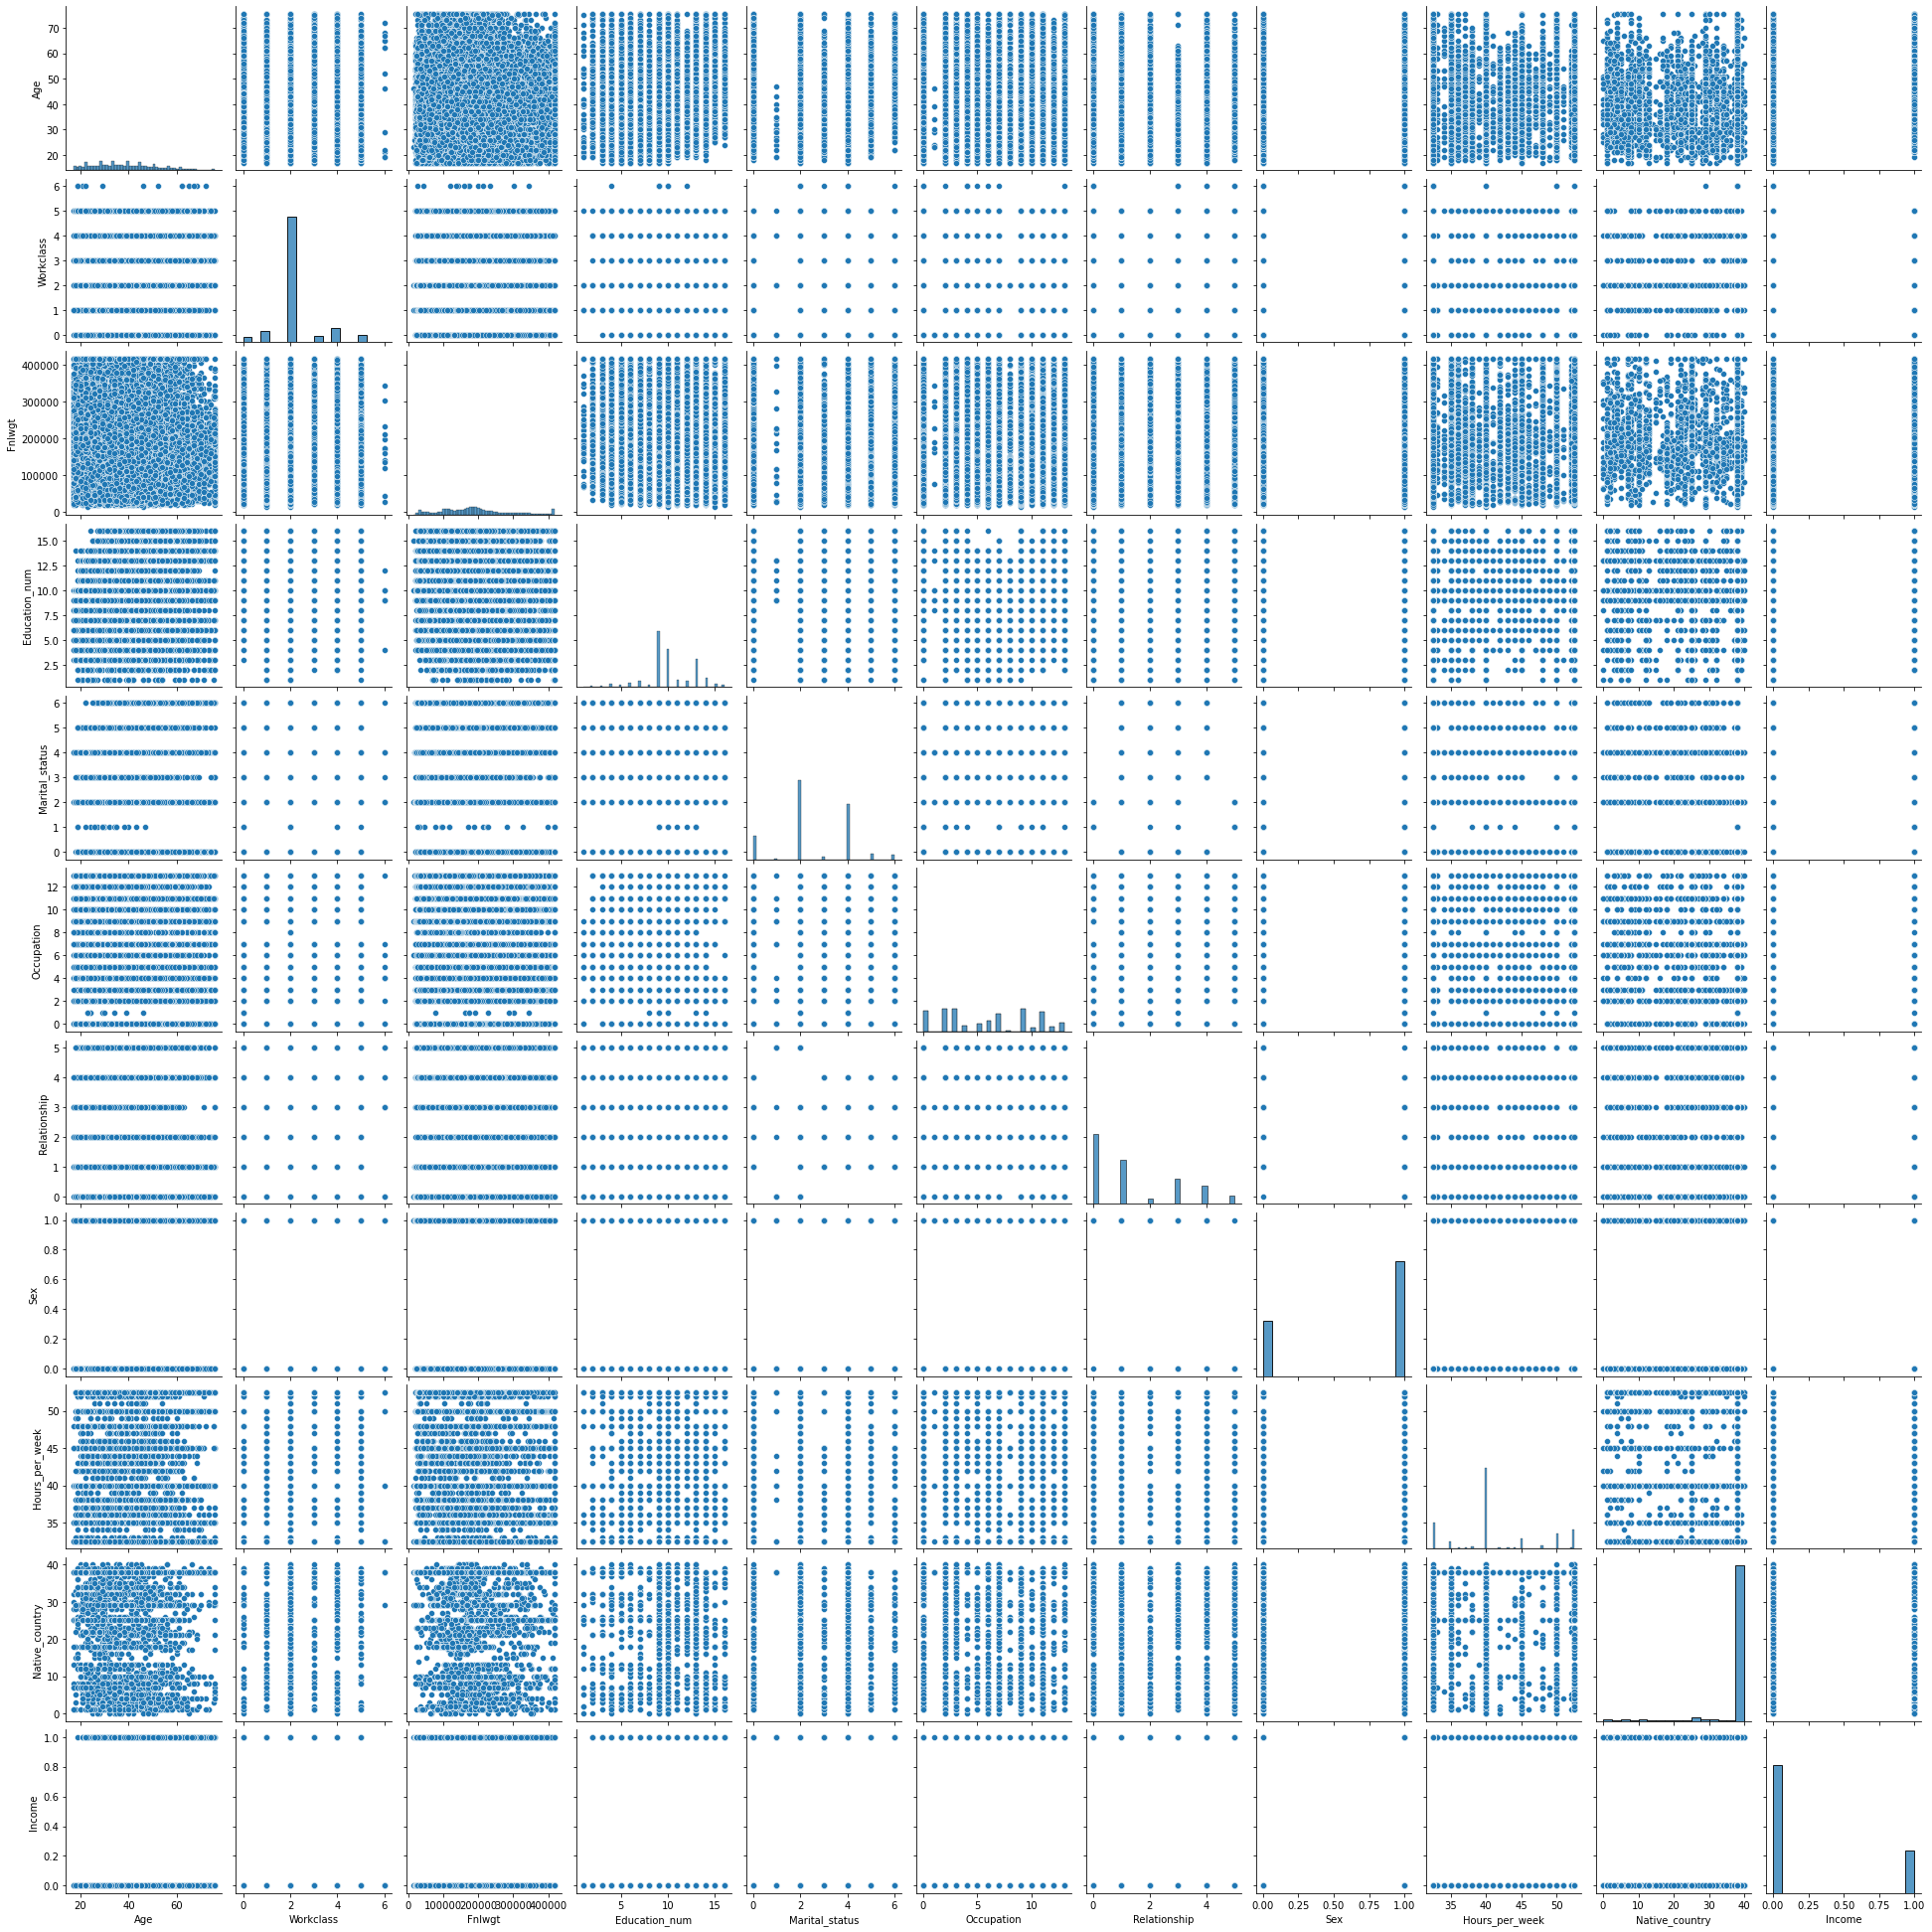

In [45]:
sns.pairplot(census_dataset)

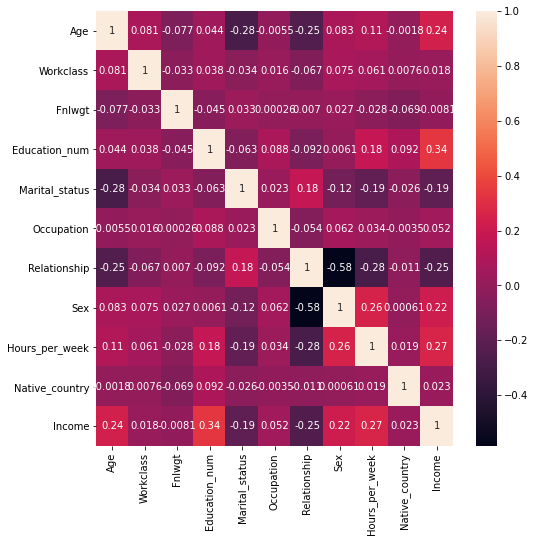

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(census_dataset.corr(), annot=True)
plt.show()

Sex and Relationship have multi collinearity also Marital status and relationship are co related. Logically Relationship also doesn't play a role in Income of a person generally.

In [47]:
census_dataset.drop(columns=['Sex','Marital_status','Relationship'],inplace=True)

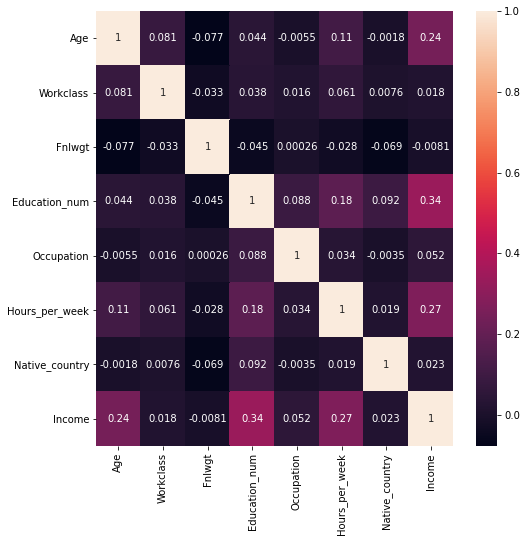

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(census_dataset.corr(), annot=True)
plt.show()

In [49]:
X=census_dataset.drop(columns=['Income'])
Y=census_dataset['Income']

In [50]:
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [51]:
#VIF for Region prediction
#checking VIF value 
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

,feature,VIF
0,Age,1.024140
1,Workclass,1.010799
2,Fnlwgt,1.012923
3,Education_num,1.052087
4,Occupation,1.008540
5,Hours_per_week,1.048125
6,Native_country,1.012981


VIF values of independent columns are all below the value of 5.

# Oversampling and Model training and selection

In [86]:
oversample = SMOTE()
X_over, Y_over = oversample.fit_resample(X_scaled, Y)

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X_over, Y_over, train_size=0.8,stratify=Y_over)

In [93]:
Counter(Y_train)

Counter({0: 18122, 1: 18122})

In [94]:
X_train.shape

(36244, 7)

In [95]:
svm=SVC()
parameter_svm={
            'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
    
}
svm_gs= gs(estimator =svm, param_grid=parameter_svm,cv=5,refit=True, n_jobs=5)
svm_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [96]:
svm_gs.best_estimator_

SVC(C=1000, gamma=1)

In [97]:
model1=SVC(C=1000, gamma=1)
model1.fit(X_train,Y_train)
p1=model1.predict(X_test)
print(classification_report(p1, Y_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      4127
           1       0.86      0.79      0.82      4935

    accuracy                           0.82      9062
   macro avg       0.82      0.82      0.82      9062
weighted avg       0.82      0.82      0.82      9062



In [98]:
xgb=XGBClassifier(objective = 'binary:logistic')
param= {'n_estimators': [150, 200, 300, 400],
              'learning_rate': [0.01, 0.02,0.03,0.1],
              'subsample': [0.3, 0.6],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.4,0.5],
              'min_child_weight': [1, 2, 3, 4]
             }
CV_xgb = gs(xgb,param_grid=param,cv=5,refit=True, n_jobs=-1)
CV_xgb.fit(X_train,Y_train)

[14:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [99]:
CV_xgb.best_score_

0.8586525674394612

In [100]:
CV_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [101]:
model2=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1,
              n_estimators=400, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)
model2.fit(X_train,Y_train)
p2=model2.predict(X_test)
print(classification_report(p2, Y_test))

[14:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      4833
           1       0.83      0.89      0.86      4229

    accuracy                           0.86      9062
   macro avg       0.86      0.86      0.86      9062
weighted avg       0.86      0.86      0.86      9062



In [111]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = gs(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [112]:
gs_NB.best_score_

0.7258857315175085

In [113]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=0.15199110829529336)

In [114]:
model3=GaussianNB(var_smoothing=0.15199110829529336)
model3.fit(X_train,Y_train)
p3=model3.predict(X_test)
print(classification_report(p3, Y_test))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      4363
           1       0.74      0.71      0.73      4699

    accuracy                           0.72      9062
   macro avg       0.72      0.72      0.72      9062
weighted avg       0.72      0.72      0.72      9062



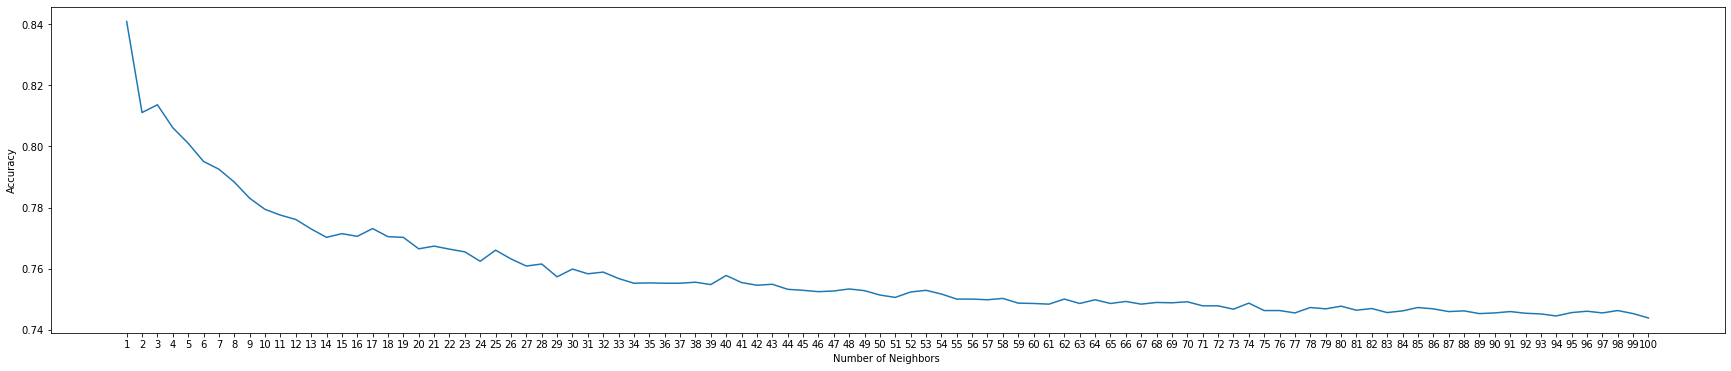

In [110]:
mean_acc = np.zeros(100)
for i in range(1,101):  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(Y_test, yhat)

loc = np.arange(1,101,step=1.0)
plt.figure(figsize = (30, 6))
plt.plot(range(1,101), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [115]:
knn=KNeighborsClassifier()
para2={
        'n_neighbors':[1,2,3],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn, param_grid=para2,cv=5, n_jobs=5)
knn_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 3], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [116]:
knn_gs.best_score_

0.8254608498941925

In [117]:
knn_gs.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [118]:
model4=KNeighborsClassifier(n_neighbors=1)
model4.fit(X_train,Y_train)
p4=model4.predict(X_test)
print(classification_report(p4, Y_test))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      3939
           1       0.91      0.80      0.85      5123

    accuracy                           0.84      9062
   macro avg       0.84      0.85      0.84      9062
weighted avg       0.85      0.84      0.84      9062



In [121]:
logr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = gs(estimator=logr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [122]:
grid_search.best_estimator_

LogisticRegression(C=0.01, solver='newton-cg')

In [123]:
model5=LogisticRegression(C=0.01, solver='newton-cg')
model5.fit(X_train,Y_train)
p5=model5.predict(X_test)
print(classification_report(p5, Y_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      4542
           1       0.72      0.72      0.72      4520

    accuracy                           0.72      9062
   macro avg       0.72      0.72      0.72      9062
weighted avg       0.72      0.72      0.72      9062



In [125]:
rfc=RandomForestClassifier()
Cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
paras={
      'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4],
    'max_leaf_nodes':[10,20,30,40,50],
    'min_samples_leaf':[100,200,300,400],
    'n_estimators':[100,200,300,400],
    'max_samples': [0.1,0.2,0.3,0.4],
    'max_features':[1,2,3,4]
}
rfc_rs= rs(estimator =rfc, param_distributions=paras,cv=Cv, n_jobs=10)
rfc_rs.fit(X_train,Y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=RandomForestClassifier(), n_jobs=10,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': [1, 2, 3, 4],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50],
                                        'max_samples': [0.1, 0.2, 0.3, 0.4],
                                        'min_samples_leaf': [100, 200, 300,
                                                             400],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400]})

In [126]:
rfc_rs.best_estimator_

RandomForestClassifier(max_depth=4, max_features=3, max_leaf_nodes=50,
                       max_samples=0.4, min_samples_leaf=100,
                       min_samples_split=4, n_estimators=200)

In [127]:
model6=RandomForestClassifier(max_depth=4, max_features=3, max_leaf_nodes=50,
                       max_samples=0.4, min_samples_leaf=100,
                       min_samples_split=4, n_estimators=200)
model6.fit(X_train,Y_train)
p6=model6.predict(X_test)
print(classification_report(p6, Y_test))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      4362
           1       0.77      0.75      0.76      4700

    accuracy                           0.75      9062
   macro avg       0.75      0.75      0.75      9062
weighted avg       0.75      0.75      0.75      9062



In [128]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, p1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, p2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, p3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, p4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(Y_test, p5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(Y_test, p6)

print('roc_auc_score for SVC: ', roc_auc_score(Y_test, p1))
print('roc_auc_score for XGB Classifier: ', roc_auc_score(Y_test, p2))
print('roc_auc_score for GaussianNB: ', roc_auc_score(Y_test, p3))
print('roc_auc_score for KNeighbors Classifier: ', roc_auc_score(Y_test, p4))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, p5))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(Y_test, p6))

roc_auc_score for SVC:  0.8163760759214301
roc_auc_score for XGB Classifier:  0.8605164422864711
roc_auc_score for GaussianNB:  0.7225777973957184
roc_auc_score for KNeighbors Classifier:  0.8408739792540277
roc_auc_score for Logistic Regression:  0.7244537629662327
roc_auc_score for Random Forest Classifier:  0.7542485102626352


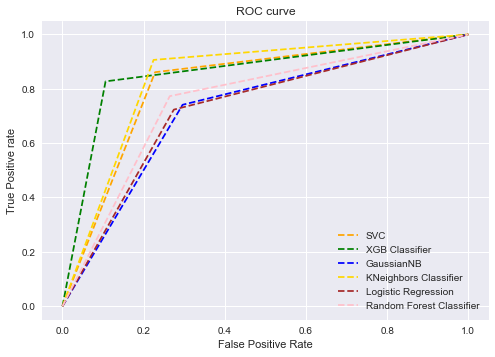

In [130]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(false_positive_rate1, true_positive_rate1, linestyle='--',color='orange', label='SVC')
plt.plot(false_positive_rate2, true_positive_rate2, linestyle='--',color='green', label='XGB Classifier')
plt.plot(false_positive_rate3, true_positive_rate3, linestyle='--', color='blue', label='GaussianNB')
plt.plot(false_positive_rate4, true_positive_rate4, linestyle='--', color='gold', label='KNeighbors Classifier')
plt.plot(false_positive_rate5, true_positive_rate5, linestyle='--', color='brown', label='Logistic Regression')
plt.plot(false_positive_rate6, true_positive_rate6, linestyle='--', color='pink', label='Random Forest Classifier')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

KNN has good accuracy but not for both the results.
XGB Classifier True Positive and Negative rate have good values so selecting XGB classifier as our model.

In [131]:
#saving the model
XGB_classifier_census= pickle.dumps(model2)